In [39]:
# Import libraries for data processing
# -----------------------------------------------------------------------
import pandas as pd  # Pandas for data manipulation and analysis in Python.

# Optional libraries (can be removed if not used):
# -----------------------------------------------------------------------
# Import libraries for web scraping and data manipulation
# from bs4 import BeautifulSoup
# import requests

# Import libraries for web browser automation with Selenium
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

# ChromeDriverManager manages the installation of the Chrome driver

# from selenium.webdriver.common.keys import Keys  # Keys is useful for simulating keyboard events in Selenium.
# from selenium.webdriver.support.ui import Select  # Select is used to interact with <select> elements on web pages.

# Import libraries for pausing execution
# -----------------------------------------------------------------------
# from time import sleep  # Sleep is used to pause the program execution for a number of seconds.

# Configurations
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Set a Pandas option to show all columns of a DataFrame.

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.options.display.max_columns = None

pd.set_option('display.float_format', '{:.2f}'.format)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind






In [40]:
data = pd.read_csv("files/data_merged.csv")

In [41]:
#data_filtered = data.groupby("Flights Booked")["Education"].sum()

In [42]:
#revisar 
for categoria in data["Education"].unique():
        
        dataframe_filtrado = data[data["Education"] == categoria]
        print(f"Los principales estadísticos de la columna 'Flights Booked' para el {categoria.upper()} son: ")
        display(dataframe_filtrado["Flights Booked"].describe().T)

Los principales estadísticos de la columna 'Flights Booked' para el BACHELOR son: 


count   252567.00
mean         4.11
std          5.22
min          0.00
25%          0.00
50%          1.00
75%          8.00
max         21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el COLLEGE son: 


count   102260.00
mean         4.17
std          5.25
min          0.00
25%          0.00
50%          1.00
75%          8.00
max         21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el MASTER son: 


count   12287.00
mean        4.20
std         5.21
min         0.00
25%         0.00
50%         1.00
75%         8.00
max        21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el HIGH SCHOOL OR BELOW son: 


count   18915.00
mean        4.18
std         5.24
min         0.00
25%         0.00
50%         1.00
75%         8.00
max        21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el DOCTOR son: 


count   17731.00
mean        4.18
std         5.26
min         0.00
25%         0.00
50%         1.00
75%         8.00
max        21.00
Name: Flights Booked, dtype: float64

In [43]:

sup_education = ["Doctor", "Master"]
low_education = ["High School or Below", "Bachelor", "College"]


In [44]:
data["TestGroup"] = data['Education'].apply(lambda x : 'Sup Education' if x in sup_education else 'Low Education')

In [45]:
data["TestGroup"].unique()

array(['Low Education', 'Sup Education'], dtype=object)

In [46]:
data['Flights Booked'].max()

21

In [47]:
def classify_bookings(num_bookings):
  """
  This function classifies the number of flight bookings into categories.

  Args:
      num_bookings (int): The number of flight bookings for a client.

  Returns:
      str: The category of the number of bookings.
  """
  if num_bookings <= 7:
    return "Low Flyer"
  else:
    return "High Flyer"    

In [48]:
data["Variable"] = data['Flights Booked'].apply(classify_bookings)

In [49]:
table = pd.crosstab(data['TestGroup'], data['Variable']) 

In [50]:
table

Variable,High Flyer,Low Flyer
TestGroup,,
Low Education,98752,274990
Sup Education,8031,21987


In [51]:
# Calcular el porcentaje para 'High Flyer' en cada fila
table['High Flyer %'] = table['High Flyer'] / (table['High Flyer'] + table['Low Flyer']) * 100

# Usar los valores originales de 'Low Flyer' para calcular el porcentaje en cada fila
table['Low Flyer %'] = table['Low Flyer'] / (table['High Flyer'] + table['Low Flyer']) * 100

table

Variable,High Flyer,Low Flyer,High Flyer %,Low Flyer %
TestGroup,,,,
Low Education,98752,274990,26.42,73.58
Sup Education,8031,21987,26.75,73.25


Establecemos las hipótesis:
- H0 : No existe una relación entre el nivel de estudios general y la frecuencia de viajes
- H1: Existe una relación entre el nivel de estudios y la frecuencia de viajes

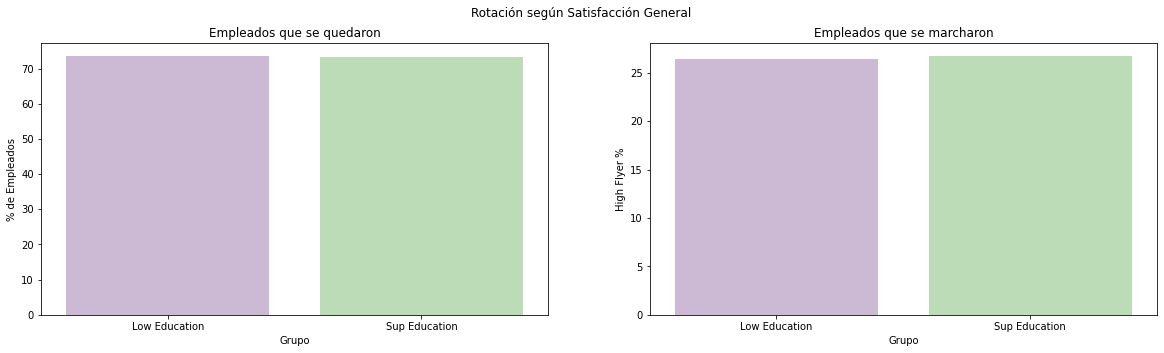

In [55]:
# Cambiar nombres de variables

# Seleccionar paleta de colores
palette = "PRGn"

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico de "Low Flyer"
sns.barplot(x=table.index, y="Low Flyer %", data=table, palette=palette, ax=axes[0])

# Gráfico de "High Flyer"
sns.barplot(x=table.index, y="High Flyer %", data=table, palette=palette, ax=axes[1])

# Añadir puntos con valores numéricos
#sns.pointplot(x=table.index, y="Low Flyer %", data=table, color='black', ax=axes[0])
#sns.pointplot(x=table.index, y="High Flyer %", data=table, color='black', ax=axes[1])

# Título principal y etiquetas
fig.suptitle("Rotación según Satisfacción General")
axes[0].set_title("Empleados que se quedaron")
axes[1].set_title("Empleados que se marcharon")
axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("% de Empleados")
axes[1].set_xlabel("Grupo")

# Mostrar la figura
plt.show()


In [58]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(table)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa")

Con un p_value de 8.652281702838884e-114 hay una diferencia significativa
